In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load the CSV file with latitude and longitude data
data = pd.read_csv('../Cleaned_Datasets/master_accident_cleaned.csv')

In [3]:
# Convert the 'ACCIDENTDATE' column to datetime format with the specified date format
try:
    data['ACCIDENTDATE'] = pd.to_datetime(data['ACCIDENTDATE'], format='%d/%m/%Y')
except ValueError as e:
    print(f"Error converting 'ACCIDENTDATE' column to datetime: {e}")

# Check if there are any NaT (Not-a-Time) values in the 'ACCIDENTDATE' column
if data['ACCIDENTDATE'].isna().any():
    print("Warning: There are invalid date values in the 'ACCIDENTDATE' column.")

In [4]:
# Create a unique list of DEG_URBAN_NAME categories
unique_deg_urban_names = data['DEG_URBAN_NAME'].unique()

# Assign a unique color to each DEG_URBAN_NAME category
color_mapping = {
    deg_urban_name: plt.cm.tab20(i) for i, deg_urban_name in enumerate(unique_deg_urban_names)
}

# Map DEG_URBAN_NAME categories to colors
data['MarkerColor'] = data['DEG_URBAN_NAME'].map(color_mapping)

In [5]:
# Filter the data to include only dates that fall in 2020
data_2020 = data[data['ACCIDENTDATE'].dt.year == 2020]

# Create a GeoDataFrame from the filtered DataFrame
geometry = [Point(lon, lat) for lon, lat in zip(data_2020['Long'], data_2020['Lat'])]
gdf = gpd.GeoDataFrame(data_2020, geometry=geometry)

In [6]:
# Create a GeoDataFrame from the DataFrame
geometry = [Point(lon, lat) for lon, lat in zip(data['Long'], data['Lat'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

In [7]:
# Load a basemap (for example, a world map)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Tamas\anaconda3\envs\dev\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


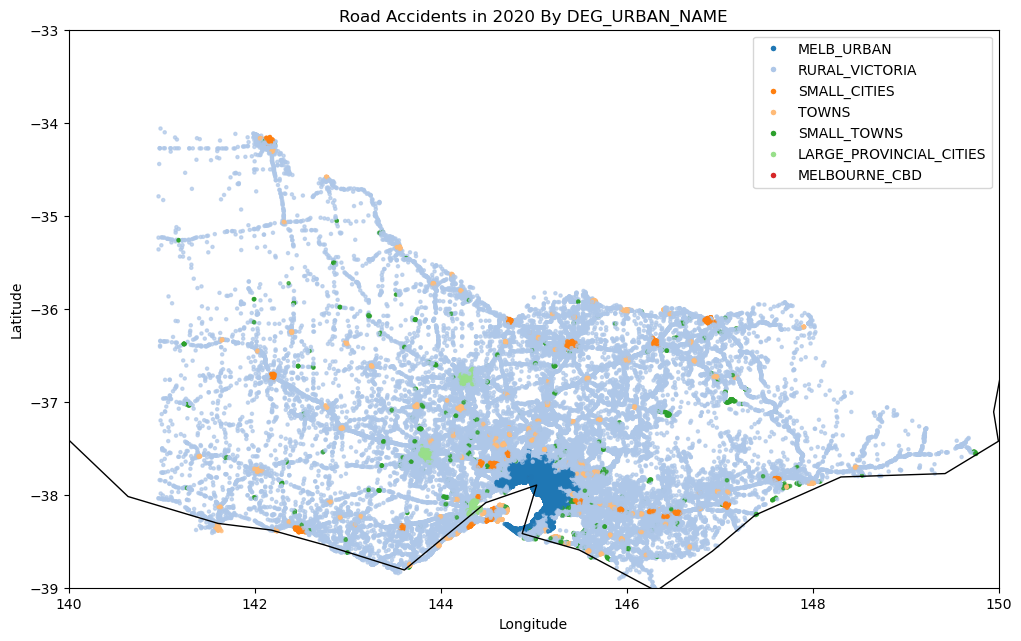

In [8]:
# Create a subplot by DEG_URBAN_NAME
fig, ax = plt.subplots(figsize=(12, 8))

# Set the extent to focus on Victoria's coordinates
extent = [140.0, 150.0, -39.0, -33.0]  # [min_lon, max_lon, min_lat, max_lat]
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])

# Plot the basemap
world.boundary.plot(ax=ax, linewidth=1, color='black')
# Plot the 2020 accidents on top of the basemap with marker colors
scatter = gdf.plot(ax=ax, markersize=5, c=gdf['MarkerColor'], alpha=0.7, legend=True)

# Create a custom legend
legend_labels = {deg_urban_name: plt.Line2D([0], [0], marker='o', color='w', markersize=5, label=deg_urban_name, markerfacecolor=color)
                 for deg_urban_name, color in color_mapping.items()}

# Add the custom legend to the plot
ax.legend(handles=list(legend_labels.values()), loc='upper right')

# Set plot title and labels
plt.title('Road Accidents in 2020 By DEG_URBAN_NAME')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/road_accidents_map_DEG_URBAN_NAME.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [9]:
# Create a unique list of REGION_NAME categories
unique_region_names = data['REGION_NAME'].unique()

# Assign a unique color to each DEG_URBAN_NAME category
color_mapping = {
    region_name: plt.cm.tab20(i) for i, region_name in enumerate(unique_region_names)
}

# Map DEG_URBAN_NAME categories to colors
data['MarkerColor'] = data['REGION_NAME'].map(color_mapping)

C:\Users\Tamas\anaconda3\envs\dev\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


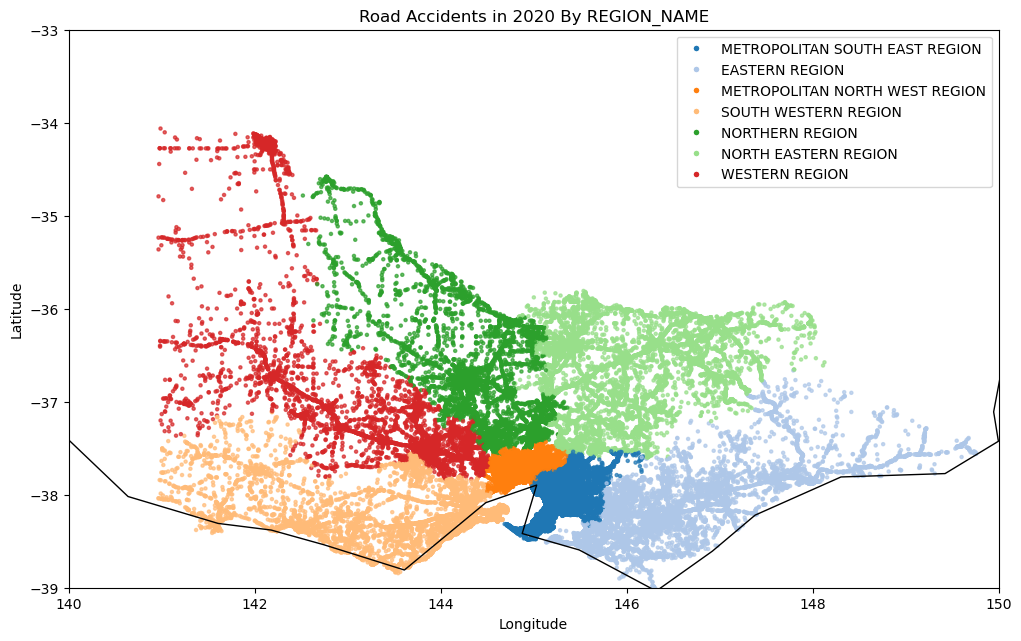

In [10]:
# Create a subplot by REGION_NAME
fig, ax = plt.subplots(figsize=(12, 8))

# Set the extent to focus on Victoria's coordinates
extent = [140.0, 150.0, -39.0, -33.0]  # [min_lon, max_lon, min_lat, max_lat]
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])

# Plot the basemap
world.boundary.plot(ax=ax, linewidth=1, color='black')
# Plot the 2020 accidents on top of the basemap with marker colors
scatter = gdf.plot(ax=ax, markersize=5, c=gdf['MarkerColor'], alpha=0.7, legend=True)

# Create a custom legend
legend_labels = {region_name: plt.Line2D([0], [0], marker='o', color='w', markersize=5, label=region_name, markerfacecolor=color)
                 for region_name, color in color_mapping.items()}

# Add the custom legend to the plot
ax.legend(handles=list(legend_labels.values()), loc='upper right')

# Set plot title and labels
plt.title('Road Accidents in 2020 By REGION_NAME')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as an image file
plt.savefig('../Exploratory_Analysis_Output/road_accidents_map_REGION_NAME.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()